In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tabulate

In [2]:
df = pd.read_csv('ejemplar.csv', encoding='utf-8') 
df.columns = df.columns.str.replace('ï»¿', '')
print (df.head().to_markdown(index=False, stralign='left', numalign= 'right'))

|   Lista | Nombre                            |   Cantidad | Categoria   |   Impuesto |   Base Impuesto |   Total Pagado |
|--------:|:----------------------------------|-----------:|:------------|-----------:|----------------:|---------------:|
|       1 | MINI BURGERS X 6                  |        101 | Hamburguesa |     140741 |         3697259 |        3838000 |
|       2 | MAIZITOS MIXTO (RESTAURANTE)      |         28 | Carnes      |      32741 |          919259 |         952000 |
|       3 | SABANERA PRO (LA MÁS PEDIDA)      |        182 | Hamburguesa |     158326 |         4519274 |        4677600 |
|       4 | ADICIÓN DE PAPAS FRITAS           |        639 | Adición     |     110000 |         3085000 |        3195000 |
|       5 | COCA COLA P400 ZERO (RESTAURANTE) |         56 | Bebidas     |      11852 |          268148 |         280000 |


In [3]:
Ventas = df.groupby('Nombre')['Cantidad'].sum()

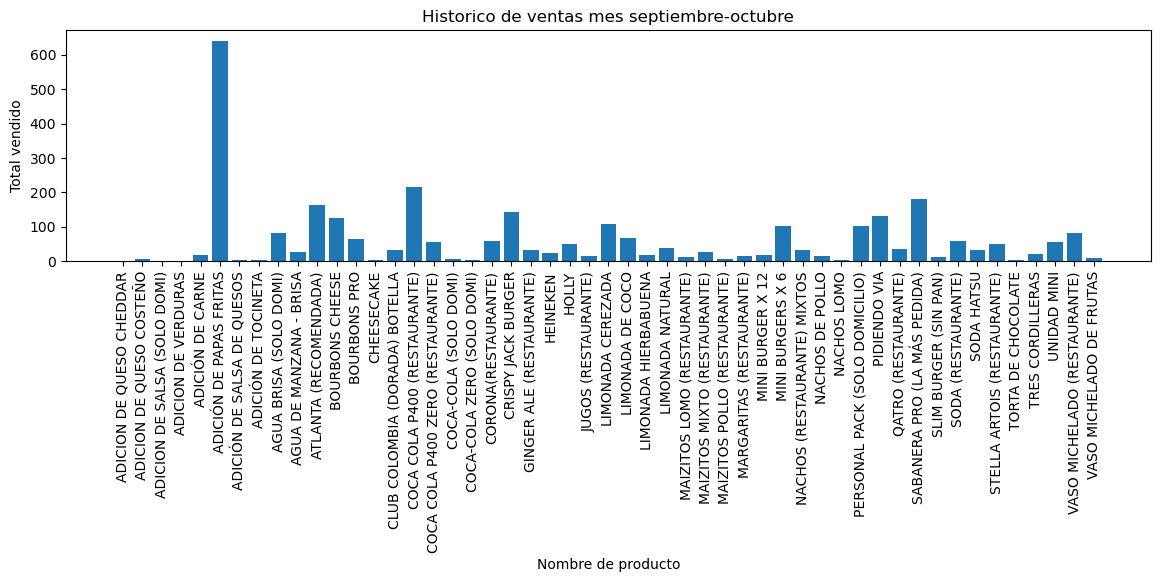

In [4]:
plt.figure(figsize=(14,3))
plt.bar(Ventas.index, Ventas.values)
plt.xlabel("Nombre de producto")
plt.ylabel("Total vendido")
plt.title("Historico de ventas mes septiembre-octubre")
plt.xticks(rotation=90)
plt.show()

In [5]:
Ventas1 = df.groupby('Nombre')['Total Pagado'].sum()

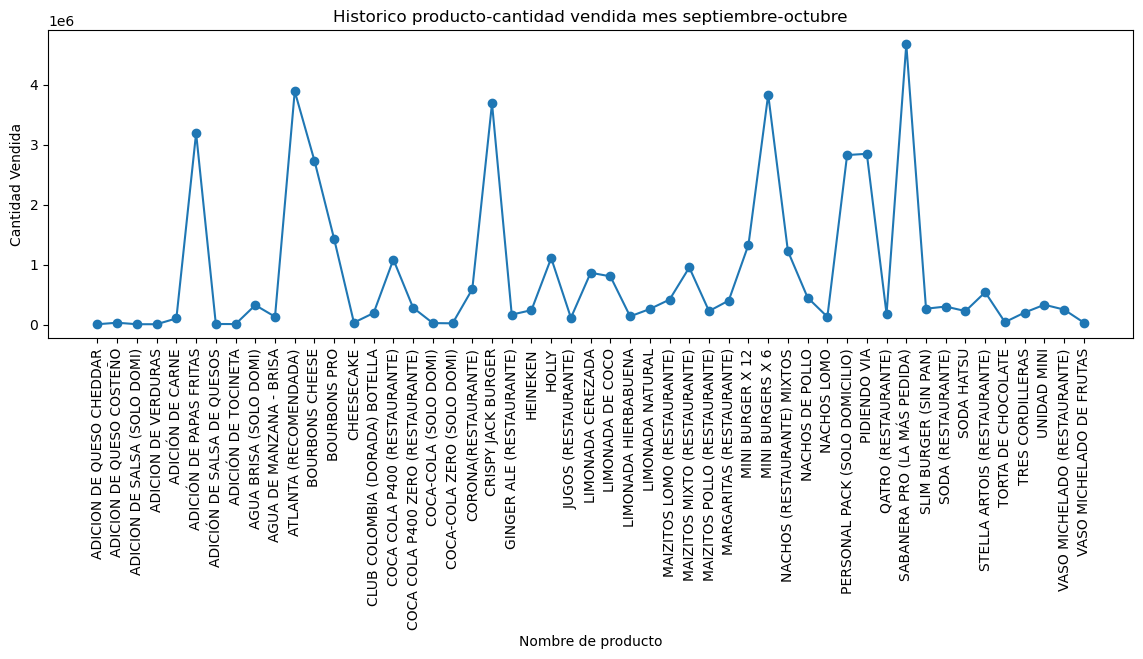

In [6]:
plt.figure(figsize=(14,4))
plt.plot(Ventas1.index, Ventas1.values, marker='o')
plt.xlabel("Nombre de producto")
plt.ylabel("Cantidad Vendida")
plt.title("Historico producto-cantidad vendida mes septiembre-octubre")
plt.xticks(rotation=90)
plt.show()

In [7]:
# Crear la nueva columna "Precio Unitario"
df['Precio Unitario'] = df['Total Pagado'] / df['Cantidad']

# Reorganizar las columnas para que "Precio Unitario" esté después de "Cantidad"
columnas = df.columns.tolist()  # Obtener la lista de columnas
idx = columnas.index('Categoria')  # Encontrar la posición de la columna "Cantidad"
columnas.insert(idx + 1, columnas.pop(columnas.index('Precio Unitario')))  # Mover "Precio Unitario" después de "Cantidad"
df = df[columnas]  # Reordenar el DataFrame con las nuevas posiciones

# Verifica los primeros resultados para asegurarte de que la columna fue agregada correctamente
print(df.head().to_markdown(index=False, stralign='left', numalign= 'right'))

|   Lista | Nombre                            |   Cantidad | Categoria   |   Precio Unitario |   Impuesto |   Base Impuesto |   Total Pagado |
|--------:|:----------------------------------|-----------:|:------------|------------------:|-----------:|----------------:|---------------:|
|       1 | MINI BURGERS X 6                  |        101 | Hamburguesa |             38000 |     140741 |         3697259 |        3838000 |
|       2 | MAIZITOS MIXTO (RESTAURANTE)      |         28 | Carnes      |             34000 |      32741 |          919259 |         952000 |
|       3 | SABANERA PRO (LA MÁS PEDIDA)      |        182 | Hamburguesa |           25701.1 |     158326 |         4519274 |        4677600 |
|       4 | ADICIÓN DE PAPAS FRITAS           |        639 | Adición     |              5000 |     110000 |         3085000 |        3195000 |
|       5 | COCA COLA P400 ZERO (RESTAURANTE) |         56 | Bebidas     |              5000 |      11852 |          268148 |         280000 |

In [8]:
media = np.mean(df['Total Pagado'])
mediana = np.median(df['Total Pagado'])
desviacion = np.std(df['Total Pagado'])
varianza = np.var(df['Total Pagado'])




In [9]:
# Agrupar por "Categoría" y obtener el producto más vendido en cada categoría
producto_mas_vendido = df.loc[df.groupby('Categoria')['Cantidad'].idxmax()]



In [10]:
print("Podemos concluir del historico de ventas del mes de Jack'II Sede San Juan Lo siguiente:")

# 1. Los productos más vendidos en cada categoría
print("Productos preferidos por los clientes en el mes de septiembre-octubre")
# Mostrar el resultado
print(producto_mas_vendido[['Categoria', 'Nombre', 'Cantidad']].to_markdown(index=False, stralign='left', numalign= 'right'))

# 2. La media, mediana y desviación estándar del historico de ventas
print(f"El promedio de ventas para el mes septiembre-octubre fue de: {media}")
print(f"La mediana de ventas para el mes septiembre-octubre fue de: {mediana}")
print(f"La desviación estándar es: {desviacion}")
print(f"La varianza es: {varianza}")

Podemos concluir del historico de ventas del mes de Jack'II Sede San Juan Lo siguiente:
Productos preferidos por los clientes en el mes de septiembre-octubre
| Categoria   | Nombre                       |   Cantidad |
|:------------|:-----------------------------|-----------:|
| Adición     | ADICIÓN DE PAPAS FRITAS      |        639 |
| Bebidas     | COCA COLA P400 (RESTAURANTE) |        217 |
| Carnes      | NACHOS (RESTAURANTE) MIXTOS  |         34 |
| Cervezas    | CORONA(RESTAURANTE)          |         59 |
| Hamburguesa | SABANERA PRO (LA MÁS PEDIDA) |        182 |
| Postres     | TORTA DE CHOCOLATE           |          5 |
El promedio de ventas para el mes septiembre-octubre fue de: 845727.4509803922
La mediana de ventas para el mes septiembre-octubre fue de: 264000.0
La desviación estándar es: 1211210.3473472118
La varianza es: 1467030505520.9534
